In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import geopandas as gpd
# 한 셀에서 여려 결과 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina' ## 그림 더 선명하게
from sklearn.preprocessing import MinMaxScaler

In [20]:
def load_and_concatenate_csv_files(directory):
    # CSV 파일 경로 패턴 설정
    pattern = os.path.join(directory, "*.csv")
    
    # 모든 CSV 파일 경로 리스트 가져오기
    csv_files = glob(pattern)
    
    # 데이터프레임 리스트 초기화
    data_frames = []
    
    # 각 CSV 파일을 읽어서 리스트에 추가
    for file in csv_files:
        df = pd.read_csv(file)
        data_frames.append(df)
    
    # 모든 데이터프레임을 행방향으로 결합
    combined_df = pd.concat(data_frames, ignore_index=True)
    
    return combined_df

# '속도 데이터' 폴더 경로
directory = '속도 데이터'

# 모든 CSV 파일을 불러와서 하나의 데이터프레임으로 결합
df = load_and_concatenate_csv_files(directory)

In [21]:
df

﻿level6 LINK ID      연월 평일 / 주말  주요시간대  도로등급   시도명     시군구명  읍면동명  \
0           45830272601  202207      주말      7  일반국도  전라북도  전주시 덕진구   조촌동   
1           45830272601  202207      주말      8  일반국도  전라북도  전주시 덕진구   조촌동   
2           45830272601  202207      주말     11  일반국도  전라북도  전주시 덕진구   조촌동   
3           45830272601  202207      주말     12  일반국도  전라북도  전주시 덕진구   조촌동   
4           45830272601  202207      주말     17  일반국도  전라북도  전주시 덕진구   조촌동   
...                 ...     ...     ...    ...   ...   ...      ...   ...   
306556      55221678901  202306      평일     17   시군도  전라북도  전주시 완산구  평화2동   
306557      55221678901  202306      평일     18   시군도  전라북도  전주시 완산구  평화2동   
306558      55221678902  202306      평일     12   시군도  전라북도  전주시 완산구  평화2동   
306559      55221678902  202306      평일     17   시군도  전라북도  전주시 완산구  평화2동   
306560      55221678902  202306      평일     18   시군도  전라북도  전주시 완산구  평화2동   

        15% 주행속도 (km/h)  25% 주행속도 (km/h)  30% 주행속도 (km/h)  50% 주행속도 (km/h)  \
0                    59               62               63               68   
1                    59               62               63               68   
2                    70               74               76               82   
3                    72               75               77               83   
4                    72               76               78               83   
...                 ...              ...              ...              ...   
306556               15               15               15               17   
306557               19               19               19               19   
306558               16               16               16               16   
306559               17               17               17               17   
306560               13               13               16               16   

        75% 주행속도 (km/h)  85% 주행속도 (km/h)  평균속도 (km/h)  속도 표준편차 (km/h)  \
0                    74               79        68.92            9.50   
1                    78               84        70.09           11.18   
2                    87               89        80.51            9.41   
3                    88               89        81.69            8.26   
4                    87               89        81.84            8.47   
...                 ...              ...          ...             ...   
306556               22               22        18.33            2.92   
306557               23               23        21.00            2.00   
306558               20               20        18.00            2.00   
306559               18               18        17.50            0.50   
306560               18               25        18.00            4.42   

        최대속도 (km/h)  
0               127  
1               109  
2               118  
3               118  
4               135  
...             ...  
306556           22  
306557           23  
306558           20  
306559           18  
306560           25  

[306561 rows x 17 columns]

In [22]:
df['연월']=df['연월'].replace({202303: '비수기', 202306: '비수기', 202207: '성수기'})

In [23]:
df=df[['연월','평일 / 주말', '주요시간대', '도로등급', '읍면동명', '평균속도 (km/h)']]

In [24]:
df.columns=['시기', '주', '시간대', '도로등급', '읍면동명', '속도_origin']

In [25]:
df=df.groupby(['시기', '주', '도로등급', '읍면동명'])['속도_origin'].mean().reset_index()

In [26]:
scaler = MinMaxScaler()

# Min-Max 스케일링 적용을 위해 그룹별로 나누고 다시 합침
df['속도'] = df.groupby('도로등급')['속도_origin'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1,1)).flatten())

In [27]:
df.drop('도로등급', axis=1, inplace=True)

In [28]:
df

시기   주  읍면동명   속도_origin        속도
0    비수기  주말  동서학동  100.827292  0.553650
1    비수기  주말  우아2동   98.995441  0.339244
2    비수기  주말   조촌동   96.097000  0.000000
3    비수기  주말  금암1동   29.489291  0.359111
4    비수기  주말  금암2동   27.600245  0.263758
..   ...  ..   ...         ...       ...
227  성수기  평일   여의동   47.165521  0.913177
228  성수기  평일   혁신동   48.830500  0.981216
229  성수기  평일  효자2동   26.793750  0.080683
230  성수기  평일  효자3동   29.553523  0.193461
231  성수기  평일  효자4동   37.523431  0.519152

[232 rows x 5 columns]

In [31]:
df=df.groupby('읍면동명')[['속도_origin', '속도']].mean().reset_index()

In [32]:
df2 = gpd.read_file('위도경도 데이터/DA_EMD_202307.shp', encoding='cp949')
df2.head()
df3=df2.to_crs(epsg=3857)
df3=df3.iloc[:,1:]
df3.columns=['동이름','code','geometry']
df3['center']=df3.geometry.centroid

BASE_DATE ADM_NM    ADM_CD  \
0  20230701  중화산2동  35011630   
1  20230701   평화2동  35011650   
2  20230701    서신동  35011660   
3  20230701   삼천3동  35011690   
4  20230701   효자1동  35011700   

                                            geometry  
0  POLYGON ((965052.051 1758878.534, 965061.431 1...  
1  POLYGON ((967046.227 1755983.548, 967055.336 1...  
2  POLYGON ((964592.838 1760507.256, 964598.255 1...  
3  POLYGON ((962534.829 1756988.424, 962582.632 1...  
4  POLYGON ((965982.433 1757067.829, 965987.867 1...

In [33]:
df3.columns=['읍면동명', 'code', 'geometry', 'center']

In [34]:
df4=df.merge(df3, on='읍면동명', how='left')

In [40]:
# GeoDataFrame으로 변환
gdf = gpd.GeoDataFrame(df4, geometry='geometry')

In [41]:
gdf['속도']=1-gdf['속도']

In [135]:
# 피벗 테이블을 사용하여 속도 차이 계산
pivot_df = gdf.pivot_table(index=['시기', '읍면동명', 'geometry', 'center'], columns='주', values='속도')

# 속도 차이 계산
pivot_df['주말-평일'] = pivot_df['주말'] - pivot_df['평일']

# 인덱스 리셋
df_diff = pivot_df.reset_index()

# Min-Max Scaling 함수 정의
def min_max_scaling(group):
    scaler = MinMaxScaler()
    group['주말-평일'] = scaler.fit_transform(group[['주말-평일']])
    return group

# 연월, 주요시간대 별로 Min-Max Scaling 적용
# df_diff = df_diff.groupby(['시기']).apply(min_max_scaling).iloc[:,1:].reset_index()

# 결과 출력
df_diff

주    시기  읍면동명                                           geometry  \
0   비수기  금암1동  POLYGON ((14152503.620 4279041.263, 14152536.5...   
1   비수기  금암2동  POLYGON ((14153524.548 4280007.921, 14153575.2...   
2   비수기   노송동  POLYGON ((14154950.861 4277106.402, 14154952.3...   
3   비수기   덕진동  POLYGON ((14153879.094 4280973.877, 14153897.4...   
4   비수기  동서학동  POLYGON ((14157252.813 4274194.203, 14157279.6...   
..  ...   ...                                                ...   
65  성수기  효자1동  POLYGON ((14151319.580 4274437.819, 14151326.2...   
66  성수기  효자2동  POLYGON ((14150349.083 4275186.411, 14150361.5...   
67  성수기  효자3동  POLYGON ((14150263.661 4274821.306, 14150262.2...   
68  성수기  효자4동  POLYGON ((14145672.258 4276621.230, 14145692.2...   
69  성수기  효자5동  POLYGON ((14149133.470 4278684.795, 14149141.0...   

주                             center        주말        평일     주말-평일  
0   POINT (14152418.093 4278447.278)  0.640889  0.484165  0.156724  
1   POINT (14153255.346 4278825.587)  0.736242  0.553953  0.182289  
2   POINT (14154871.507 4276309.416)  0.722775  0.598608  0.124167  
3   POINT (14151606.054 4279641.723)  0.604507  0.439670  0.164837  
4   POINT (14157939.902 4272458.340)  0.470746  0.400117  0.070630  
..                               ...       ...       ...       ...  
65  POINT (14152302.478 4273816.085)  0.664701  0.458572  0.206129  
66  POINT (14150853.589 4274242.663)  0.836013  0.688113  0.147900  
67  POINT (14150191.010 4273945.837)  0.840651  0.698048  0.142603  
68  POINT (14147480.042 4274540.959)  0.617718  0.465415  0.152303  
69  POINT (14148402.856 4276731.447)  0.730125  0.473651  0.256474  

[70 rows x 7 columns]

In [43]:
gdf.sort_values('속도', ascending=False)

읍면동명  속도_origin        속도      code  \
20    중앙동  22.867530  0.975134  35011740   
14   우아1동  33.920922  0.862000  35012610   
13    완산동  25.147895  0.860029  35011770   
10   송천1동  35.745072  0.828668  35012650   
22  중화산2동  25.815061  0.826352  35011630   
25   평화1동  26.081886  0.812884  35011640   
32   효자3동  28.033931  0.794135  35011720   
31   효자2동  28.241283  0.769830  35011710   
29    호성동  37.604174  0.764911  35012630   
18   인후3동  27.357963  0.748472  35012560   
27    풍남동  27.607331  0.735884  35011750   
23    진북동  28.140668  0.708963  35012690   
21  중화산1동  28.331582  0.699327  35011620   
6    삼천2동  28.584796  0.686545  35011680   
9     서신동  28.971208  0.667040  35011660   
5    삼천1동  29.221732  0.654395  35011670   
15   우아2동  59.461510  0.652120  35012620   
2     노송동  29.290192  0.650939  35011760   
34   효자5동  29.542411  0.638208  35011790   
17   인후2동  29.855920  0.622383  35012550   
1    금암2동  30.007802  0.614716  35012590   
16   인후1동  30.326932  0.598608  35012540   
30   효자1동  30.620531  0.583788  35011700   
33   효자4동  33.380345  0.560248  35011780   
0    금암1동  31.158485  0.556634  35012580   
8    서서학동  31.250884  0.551970  35011610   
11   송천2동  45.160989  0.548929  35012660   
26   평화2동  45.039450  0.532411  35011650   
3     덕진동  32.099686  0.509125  35012570   
19    조촌동  66.527609  0.459171  35012670   
7    삼천3동  47.216290  0.452884  35011690   
4    동서학동  64.939870  0.395226  35011600   
24    팔복동  51.270426  0.359201  35012600   
12    여의동  52.282161  0.228984  35012710   
28    혁신동  56.714607  0.157752  35012700   

                                             geometry  \
20  POLYGON ((14153347.681 4276884.790, 14153382.4...   
14  POLYGON ((14155368.216 4281148.428, 14155386.9...   
13  POLYGON ((14153064.353 4275014.846, 14153075.6...   
10  POLYGON ((14152224.103 4284363.408, 14152231.9...   
22  POLYGON ((14150164.396 4276674.502, 14150175.9...   
25  POLYGON ((14153485.450 4273455.249, 14153478.9...   
32  POLYGON ((14150263.661 4274821.306, 14150262.2...   
31  POLYGON ((14150349.083 4275186.411, 14150361.5...   
29  POLYGON ((14152462.059 4287181.276, 14152483.8...   
18  POLYGON ((14155881.307 4278311.460, 14155888.4...   
27  POLYGON ((14154222.371 4276244.004, 14154223.6...   
23  POLYGON ((14151429.987 4277945.504, 14151440.7...   
21  POLYGON ((14151640.010 4274218.224, 14151639.8...   
6   POLYGON ((14152175.595 4272729.259, 14152184.6...   
9   POLYGON ((14149590.421 4278688.550, 14149597.1...   
5   POLYGON ((14152290.604 4273480.310, 14152317.3...   
15  POLYGON ((14159186.017 4281478.988, 14159192.4...   
2   POLYGON ((14154950.861 4277106.402, 14154952.3...   
34  POLYGON ((14149133.470 4278684.795, 14149141.0...   
17  POLYGON ((14153672.035 4280085.003, 14153675.9...   
1   POLYGON ((14153524.548 4280007.921, 14153575.2...   
16  POLYGON ((14155529.498 4279048.262, 14155554.4...   
30  POLYGON ((14151319.580 4274437.819, 14151326.2...   
33  POLYGON ((14145672.258 4276621.230, 14145692.2...   
0   POLYGON ((14152503.620 4279041.263, 14152536.5...   
8   POLYGON ((14154247.714 4274619.809, 14154328.9...   
11  POLYGON ((14151499.812 4287068.463, 14151510.4...   
26  POLYGON ((14152635.309 4273100.966, 14152646.6...   
3   POLYGON ((14153879.094 4280973.877, 14153897.4...   
19  POLYGON ((14145051.872 4286676.797, 14145063.0...   
7   POLYGON ((14147072.049 4274322.311, 14147131.1...   
4   POLYGON ((14157252.813 4274194.203, 14157279.6...   
24  POLYGON ((14149101.774 4282714.018, 14149184.5...   
12  POLYGON ((14147129.448 4279772.741, 14147123.5...   
28  POLYGON ((14144549.935 4279602.497, 14144562.4...   

                              center  
20  POINT (14153214.689 4275963.298)  
14  POINT (14155390.190 4280022.680)  
13  POINT (14153220.834 4274397.217)  
10  POINT (14152186.501 4282237.607)  
22  POINT (14150935.550 4275837.568)  
25  POINT (14153318.715 4272503.402)  
32  POINT (14150191.010 4273945.837)  
31  POINT (14150853.589 4274242.663)  
29  POINT (14153

In [149]:
df5=gdf.pivot_table(index=['읍면동명', 'geometry', 'center'], columns=['주', '시기'], values='속도').reset_index()

df5

주    읍면동명                                           geometry  \
시기                                                             
0    금암1동  POLYGON ((14152503.620 4279041.263, 14152536.5...   
1    금암2동  POLYGON ((14153524.548 4280007.921, 14153575.2...   
2     노송동  POLYGON ((14154950.861 4277106.402, 14154952.3...   
3     덕진동  POLYGON ((14153879.094 4280973.877, 14153897.4...   
4    동서학동  POLYGON ((14157252.813 4274194.203, 14157279.6...   
5    삼천1동  POLYGON ((14152290.604 4273480.310, 14152317.3...   
6    삼천2동  POLYGON ((14152175.595 4272729.259, 14152184.6...   
7    삼천3동  POLYGON ((14147072.049 4274322.311, 14147131.1...   
8    서서학동  POLYGON ((14154247.714 4274619.809, 14154328.9...   
9     서신동  POLYGON ((14149590.421 4278688.550, 14149597.1...   
10   송천1동  POLYGON ((14152224.103 4284363.408, 14152231.9...   
11   송천2동  POLYGON ((14151499.812 4287068.463, 14151510.4...   
12    여의동  POLYGON ((14147129.448 4279772.741, 14147123.5...   
13    완산동  POLYGON ((14153064.353 4275014.846, 14153075.6...   
14   우아1동  POLYGON ((14155368.216 4281148.428, 14155386.9...   
15   우아2동  POLYGON ((14159186.017 4281478.988, 14159192.4...   
16   인후1동  POLYGON ((14155529.498 4279048.262, 14155554.4...   
17   인후2동  POLYGON ((14153672.035 4280085.003, 14153675.9...   
18   인후3동  POLYGON ((14155881.307 4278311.460, 14155888.4...   
19    조촌동  POLYGON ((14145051.872 4286676.797, 14145063.0...   
20    중앙동  POLYGON ((14153347.681 4276884.790, 14153382.4...   
21  중화산1동  POLYGON ((14151640.010 4274218.224, 14151639.8...   
22  중화산2동  POLYGON ((14150164.396 4276674.502, 14150175.9...   
23    진북동  POLYGON ((14151429.987 4277945.504, 14151440.7...   
24    팔복동  POLYGON ((14149101.774 4282714.018, 14149184.5...   
25   평화1동  POLYGON ((14153485.450 4273455.249, 14153478.9...   
26   평화2동  POLYGON ((14152635.309 4273100.966, 14152646.6...   
27    풍남동  POLYGON ((14154222.371 4276244.004, 14154223.6...   
28    혁신동  POLYGON ((14144549.935 4279602.497, 14144562.4...   
29    호성동  POLYGON ((14152462.059 4287181.276, 14152483.8...   
30   효자1동  POLYGON ((14151319.580 4274437.819, 14151326.2...   
31   효자2동  POLYGON ((14150349.083 4275186.411, 14150361.5...   
32   효자3동  POLYGON ((14150263.661 4274821.306, 14150262.2...   
33   효자4동  POLYGON ((14145672.258 4276621.230, 14145692.2...   
34   효자5동  POLYGON ((14149133.470 4278684.795, 14149141.0...   

주                             center        주말                  평일            
시기                                         비수기       성수기       비수기       성수기  
0   POINT (14152418.093 4278447.278)  0.640889  0.646475  0.484165  0.455006  
1   POINT (14153255.346 4278825.587)  0.736242  0.720467  0.553953  0.448204  
2   POINT (14154871.507 4276309.416)  0.722775  0.713371  0.598608  0.569003  
3   POINT (14151606.054 4279641.723)  0.604507  0.601194  0.439670  0.391129  
4   POINT (14157939.902 4272458.340)  0.470746  0.424442  0.400117  0.285599  
5   POINT (14151584.157 4273176.083)  0.737160  0.705265  0.615582  0.559572  
6   POINT (14151259.526 4272520.673)  0.802838  0.756873  0.657420  0.529049  
7   POINT (14147013.419 4269229.337)  0.496624  0.474458  0.430981  0.409473  
8   POINT (14154559.732 4272220.267)  0.609828  0.569282  0.542091  0.486678  
9   POINT (14150472.911 4277575.262)  0.774172  0.761929  0.587830  0.544230  
10  POINT (14152186.501 4282237.607)  0.863720  0.857301  0.804268  0.789383  
11  POINT (14150203.474 4284482.399)  0.638043  0.589784  0.505529  0.462362  
12  POINT (14145897.945 4281468.899)  0.304839  0.277509  0.174925  0.158666  
13  POINT (14153220.834 4274397.217)  0.930866  0.897439  0.837114  0.774696  
14  POINT (14155390.190 4280022.680)  0.913859  0.901533  0.841275  0.791331  
15  POINT (14159061.129 4277112.066)  0.740023  0.689807  0.617258  0.561392  
16  POINT (14154933.566 4278353.361)  0.693259  0.641424  0.545135  0.514613  
17  POINT (14154026.292 4278766.352)  0.706320  0.684847  0.571579  0.526786  
18  POINT (14155757.837 4277166.669)  0.849814  0.7

In [44]:
gdf.to_csv('교통혼잡도.csv', index=False)

In [136]:
gdf2=gpd.GeoDataFrame(df_diff, geometry='geometry')

In [137]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.ioff()

# 전체 페이지 크기 설정
fig, axs = plt.subplots(2, 2, figsize=(48, 48))  # 6x6 서브플롯

for idx, ax in enumerate(axs.flat):
    i = idx * 35
    if i >= len(gdf):
        ax.axis('off')  # 데이터가 없으면 축을 끕니다.
        continue

    # 범례용 구분자 추가
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    # 데이터 플롯
    if (i + 35) <= len(df4):
        df4_subset = gdf.iloc[i:i + 35, :]
    else:
        df4_subset = gdf.iloc[i:, :]

    df4_subset.plot(column="속도_origin", ax=ax, legend=True, cmap='coolwarm', cax=cax)

    # 제목 설정
    ax.set_title(f"{gdf.iloc[i, 0]} {gdf.iloc[i, 1]} 교통 혼잡도", fontsize=60, pad=20)

    # 지역명 추가
    for idx, row in df4_subset.iterrows():
        # 중심 좌표 가져오기
        lat = row.geometry.centroid.y
        long = row.geometry.centroid.x

        # 지역명 추가
        ax.text(long, lat, row["읍면동명"], fontsize=20, color='black', fontweight='bold', ha='center', va='center')

    # 축 숨기기
    ax.set_axis_off()

# 서브플롯 간격 조정
plt.tight_layout()

# 플롯 표시
plt.show()

plt.ion();

In [138]:
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.ioff()

# 전체 페이지 크기 설정
fig, axs = plt.subplots(2, 2, figsize=(48, 48))  # 6x6 서브플롯

for idx, ax in enumerate(axs.flat):
    i = idx * 35
    if i >= len(gdf):
        ax.axis('off')  # 데이터가 없으면 축을 끕니다.
        continue

    # 범례용 구분자 추가
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    # 데이터 플롯
    if (i + 35) <= len(df4):
        df4_subset = gdf.iloc[i:i + 35, :]
    else:
        df4_subset = gdf.iloc[i:, :]

    df4_subset.plot(column="속도", ax=ax, legend=True, cmap='coolwarm', cax=cax)

    # 제목 설정
    ax.set_title(f"{gdf.iloc[i, 0]} {gdf.iloc[i, 1]} 교통 혼잡도", fontsize=60, pad=20)

    # 지역명 추가
    for idx, row in df4_subset.iterrows():
        # 중심 좌표 가져오기
        lat = row.geometry.centroid.y
        long = row.geometry.centroid.x

        # 지역명 추가
        ax.text(long, lat, row["읍면동명"], fontsize=20, color='black', fontweight='bold', ha='center', va='center')

    # 축 숨기기
    ax.set_axis_off()

# 서브플롯 간격 조정
plt.tight_layout()

# 플롯 표시
plt.show()

plt.ion();

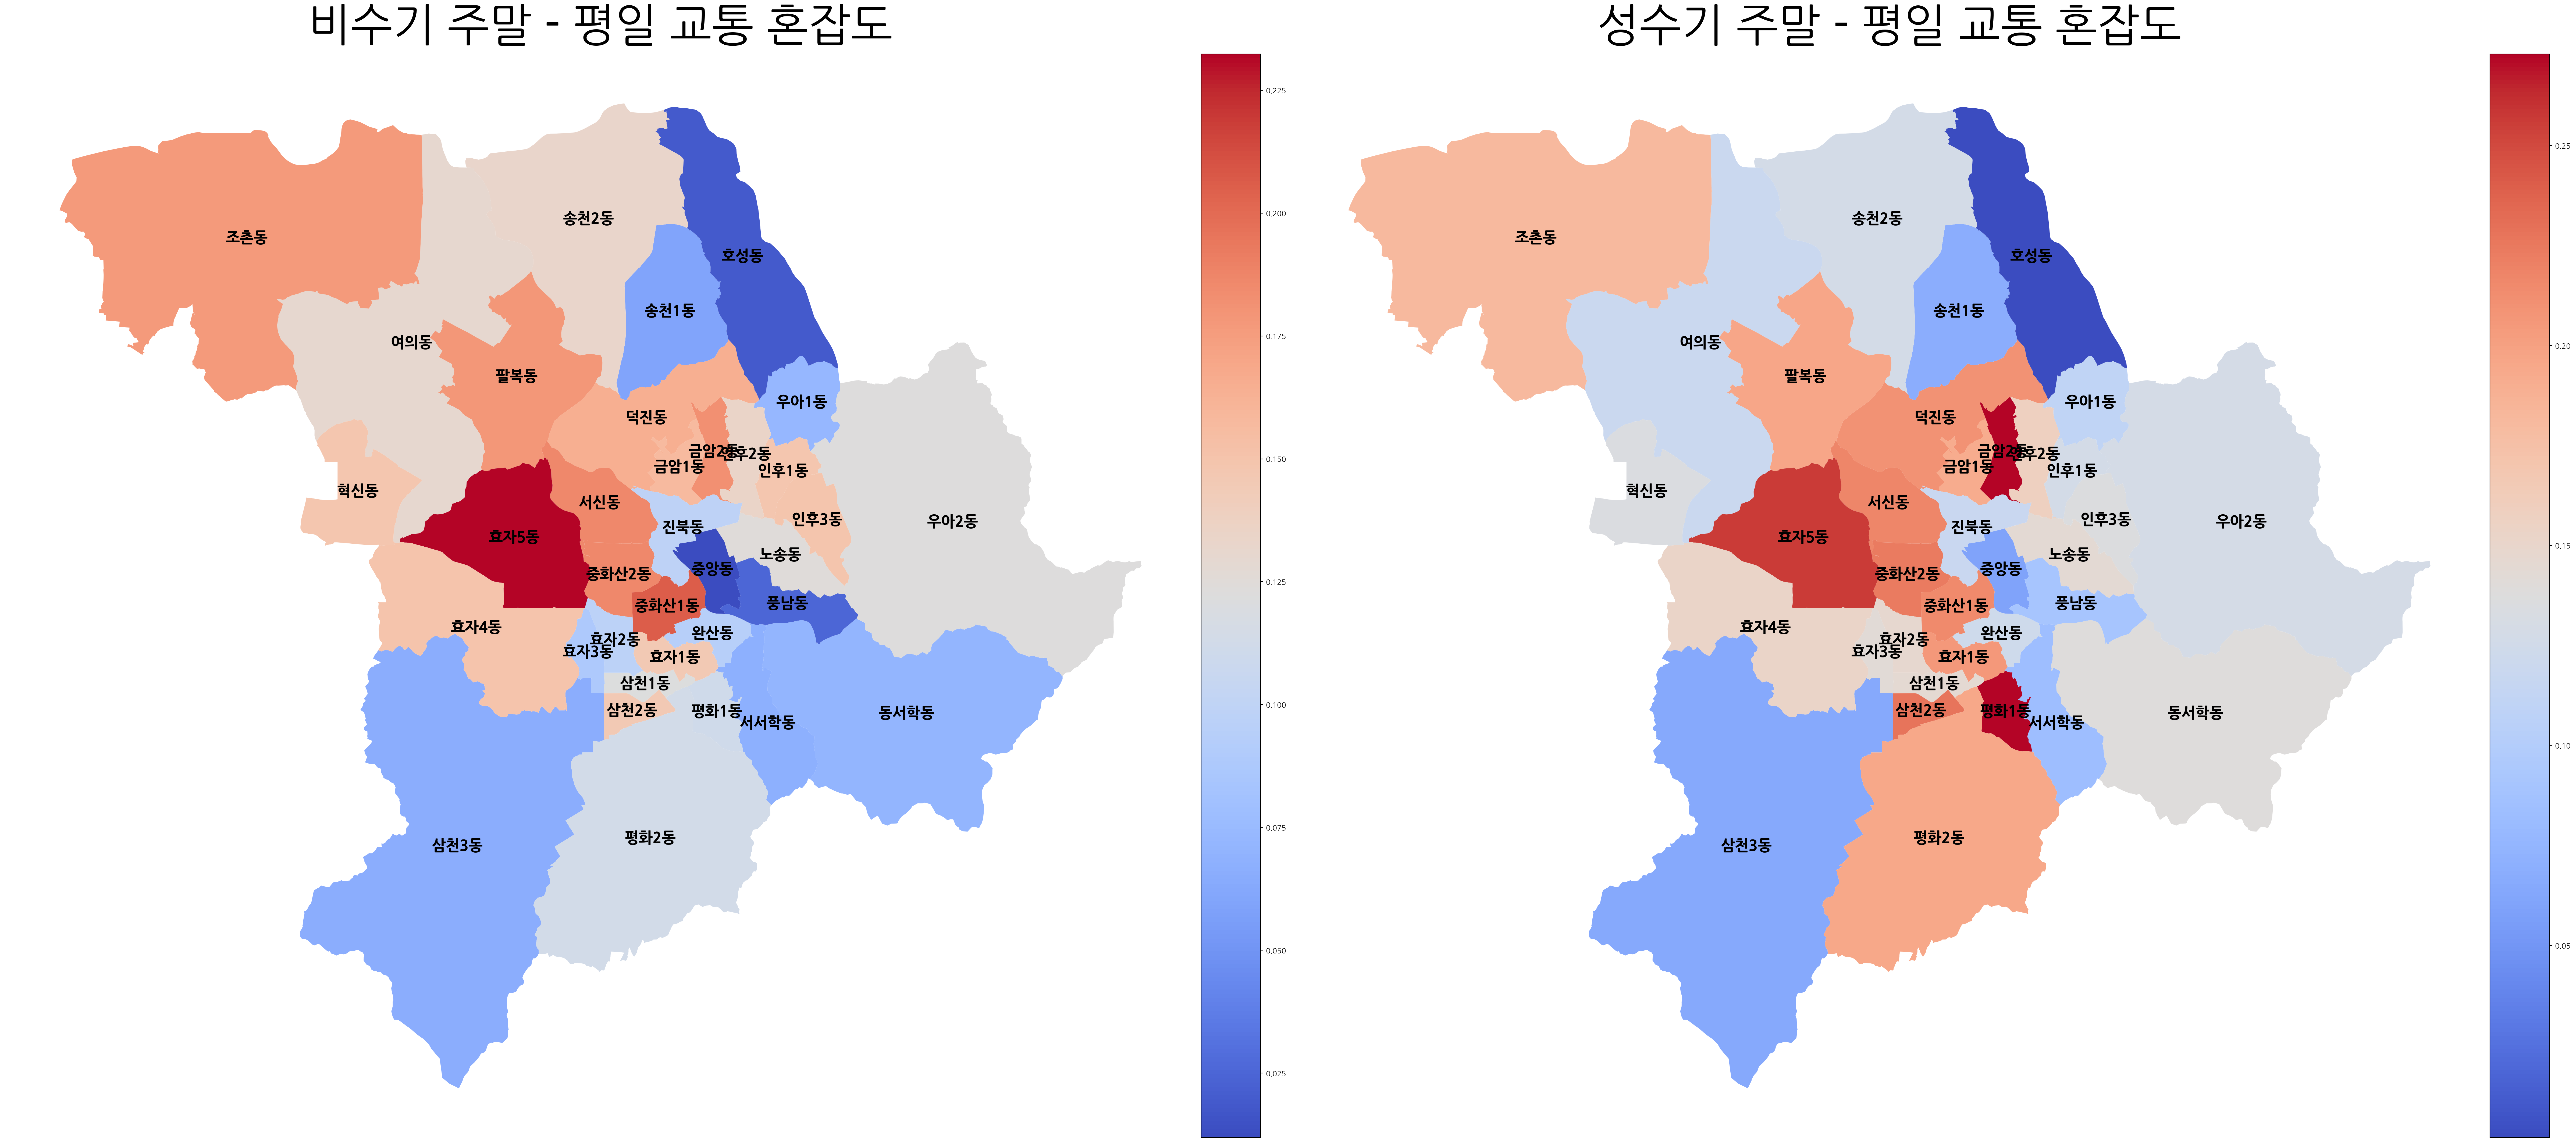

In [87]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.ioff()

# 전체 페이지 크기 설정
fig, axs = plt.subplots(1, 2, figsize=(48, 24))  # 3x6 서브플롯

for idx, ax in enumerate(axs.flat):
    i = idx * 35
    if i >= len(gdf2):
        ax.axis('off')  # 데이터가 없으면 축을 끕니다.
        continue

    # 범례용 구분자 추가
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    # 데이터 플롯
    if (i + 35) <= len(df_diff):
        df_subset = gdf2.iloc[i:i + 35, :]
    else:
        df_subset = gdf2.iloc[i:, :]

    df_subset.plot(column="주말-평일", ax=ax, legend=True, cmap='coolwarm', cax=cax)

    # 제목 설정
    ax.set_title(f"{gdf2.iloc[i, 0]} 주말 - 평일 교통 혼잡도", fontsize=60, pad=20)

    # 지역명 추가
    for idx, row in df_subset.iterrows():
        # 중심 좌표 가져오기
        lat = row.geometry.centroid.y
        long = row.geometry.centroid.x

        # 지역명 추가
        ax.text(long, lat, row["읍면동명"], fontsize=20, color='black', fontweight='bold', ha='center', va='center')

    # 축 숨기기
    ax.set_axis_off()

# 서브플롯 간격 조정
plt.tight_layout()

# 플롯 표시
plt.show()

plt.ion();

In [3]:
import geopandas as gpd

building=gpd.read_file('건물 데이터/BULD_STORE_COM_SUNDO_35_전라북도_샘플_전주시.shp')

In [12]:
building['CMSC_L_NM'].unique()

array(['음식', '소매', '부동산', '관광/여가/오락', '생활서비스', '학문/교육', '스포츠', '숙박'],
      dtype=object)

In [15]:
building[building['CMSC_L_NM']=='소매']['CMSC_M_NM'].unique()

array(['음/식료품소매', '종합소매점', '철물/난방/건설자재소매', '사진/광학/정밀기기소매', '애견/애완/동물',
       '가정/주방/인테리어', '사무/문구/컴퓨터', '예술품/골동품/수석/분재', '자동차/자동차용품', '화장품소매',
       '의복의류', '가방/신발/액세서리', '취미/오락관련소매', '의약/의료품소매', '기타판매업',
       '운동/경기용품소매', '선물/팬시/기념품', '가구소매', '건강/미용식품', '시계/귀금속소매',
       '중고품소매/교환', '가전제품소매', '책/서적/도서', '페인트/유리제품소매', '종교용품판매', '유아용품'],
      dtype=object)